In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#city_df
#ride_df


# Combine the data into a single dataset *merge
merge_table = pd.merge(ride_df, city_df, how= "left", on="city")


# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#The calculations part
#city_merge = merge_table.groupby("city")
#city_merge

urban = merge_table[merge_table["type"] == "Urban"]
rural = merge_table[merge_table["type"] == "Rural"]
suburban = merge_table[merge_table["type"] == "Suburban"]


#Average Fare ($) Per City--these are the "y" values
urb_fare = urban["fare"].mean()
ru_fare = rural["fare"].mean()
sub_fare = suburban["fare"].mean()

#Total Number of Rides Per City--the "x" values
urb_ride = urban["ride_id"].count()
ru_ride = rural["ride_id"].count()
sub_ride = suburban["ride_id"].count()

#Total Number of Drivers Per City--the "s"/size values
urb_driver_count= urban["driver_count"].sum()
ru_driver_count = rural["driver_count"].sum()
sub_driver_count = suburban["driver_count"].sum()


## Bubble Plot of Ride Sharing Data

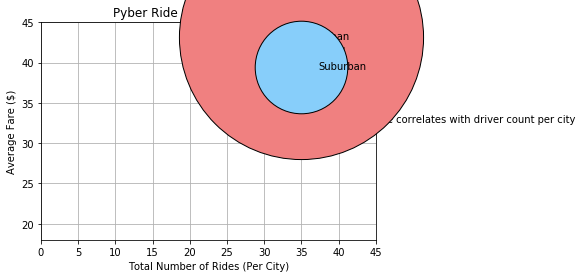

In [4]:
#color scheme(Gold, SkyBlue, and Coral) 
# Build the scatter plots for each city types

plt.xlim(0,45)
plt.ylim(18,45)

#Urban 
plt.scatter(urb_ride, urb_fare, s=urb_driver_count, marker="o", c="lightcoral", edgecolors="black",
             label="Urban")
#Rural
plt.scatter(ru_ride, ru_fare, s=ru_driver_count, marker="o", c="orange", edgecolors="black",
             label="Rural")
#Suburban 
plt.scatter(sub_ride, sub_fare, s=sub_driver_count, marker="o", c="lightskyblue", edgecolors="black",
             label="Suburban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
plt.text(40, 35, "Note: \nCircle size correlates with driver count per city", ha='left', va='top')

# Save Figure
plt.savefig("../Images/RideBubble.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

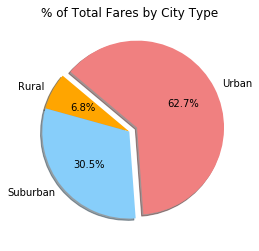

In [6]:
# Calculate Fare Percents
percent = merge_table.groupby("type")
total_fare =percent["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["orange", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/FarePie.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

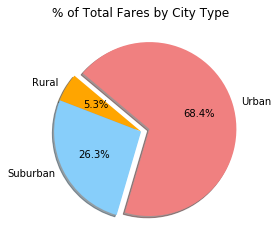

In [9]:
# Calculate Ride Percents
total_rides = percent["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["orange", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/RidePie.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

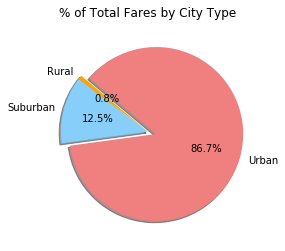

In [16]:
# Calculate Driver Percents
total_driver = percent["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["orange", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/DriverPie.png")

In [ ]:
# Show Figure
plt.show()